<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

## Lab on NNDL Part 1: Tensorflow Basic

### Tensors

Tensors are multi-dimensional arrays with a uniform type

##Question 1


### Create a rank-0 tensor
- A "scalar" is called "rank-0" tensor
- the tensor should contain value 99.99

In [1]:
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [2]:
tf1 = tf.constant(99.99)

In [3]:
tf1.shape

TensorShape([])

# Create a rank-1 tensor

- A "vector" (list) is called "rank-1" tensor [9,8,7,6,5]
- A vector has one axis

In [4]:
tf2 = tf.constant([9,8,7,6,5])

In [5]:
tf2.shape

TensorShape([5])

In [6]:
tf2.ndim

1

### Add 7 to all the elements of the above created tensor
- Use Broadcasting

In [7]:
tf3 = tf.add(7,[9,8,7,6,5])

In [8]:
tf3.shape

TensorShape([5])

In [9]:
print(tf3)

tf.Tensor([16 15 14 13 12], shape=(5,), dtype=int32)


### Create a rank-2 tensor
[[1, 2, 3], [ 4,5,6]]
- A "matrix"  "is called rank-2" tensor
- It has 2 axes

In [10]:
tf4 = tf.constant([[1, 2, 3], [ 4,5,6]])

In [11]:
tf4.shape

TensorShape([2, 3])

In [12]:
print(tf4)

tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)


### Change the shape of the above created tensor to shape (3,2)

In [13]:
tf5 = tf.reshape(tf4,(3,2))

In [14]:
tf5.shape

TensorShape([3, 2])

In [15]:
print(tf5)

tf.Tensor(
[[1 2]
 [3 4]
 [5 6]], shape=(3, 2), dtype=int32)


### Check the dtype, number of axes and the shape of tensor

In [16]:
tf5.dtype

tf.int32

In [17]:
tf5.shape

TensorShape([3, 2])

In [18]:
print(tf5)

tf.Tensor(
[[1 2]
 [3 4]
 [5 6]], shape=(3, 2), dtype=int32)


- Tensors can have more axes, like rank-3 or rank-4 tensor

##Lab on NNDL Part 2: Cars selling price prediction

### Data Set -
Domain: Finance, Business 
Data: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=Car+details+v3.csv

The data contains various features of used cars.

#### Features

1. year

2. selling_price: Price at which it was sold (**Target Feature**)

3. km_driven

4. fuel

5. seller_type

6. transmission

7. Owner

8. mileage

9. engine

10. max_power

11. seats

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

##Objective

Predict the selling price of used cars based on the given features

## Steps to perform:

#### 1. Import important Libraries
#### 2. Import Dataset and exploration
#### 3. Data Pre-processing
#### 4. Training a Neural Network Model
#### 5. Evaluating the model
#### 6. Conclusion


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


### Import important libraries

In [19]:
import pandas as pd,numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras

Using TensorFlow backend.


## Question 1

### Load the data
- Load the data, check the shape of data

In [20]:
df = pd.read_csv(r'C:\Users\RKRIS\Downloads\car_data-1.csv')

In [21]:
print(df.shape)
df.head()

(8128, 11)


,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   mileage        7907 non-null   object 
 8   engine         7907 non-null   object 
 9   max_power      7913 non-null   object 
 10  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 698.6+ KB
None


## Question 2

### Preprocess the data
- Convert mileage, engine and max_power to numerical by extract numerical values from the strings
- Label Encode: 'owner' column
- One Hot Encode: 'fuel','seller_type','transmission' columns
- Drop all the instances with null values

In [23]:
def convert_numeric(x):
    try:
        if type(x) == str:
            return float(x.split()[0])
        else:
            return x
    except:
        return np.nan

In [24]:
df['mileage']=df['mileage'].map(convert_numeric)

In [25]:
df['engine']=df['engine'].map(convert_numeric)

In [26]:
df['max_power']=df['max_power'].map(convert_numeric)

In [27]:
df.head(2)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0


In [28]:
def onehot_encode(df, columns):
    dummies = pd.get_dummies(df[columns], prefix=columns)
    df =pd.concat([df, dummies], axis=1)
    df = df.drop(columns, axis =1)
    
    return df

In [29]:
def preprocess_inputs(df):
    
    # Mapping the Owner column
    df['owner'] = df.owner.map({'First Owner': 1, 'Second Owner' : 2, 'Third Owner' : 3,
       'Fourth & Above Owner': 4, 'Test Drive Car' : 0})
    
    # Treating null_values
    df['owner'] = df['owner'].fillna(df['owner'].mode())
    df['mileage'] = df['mileage'].fillna(df['mileage'].mean())
    df['engine'] = df['engine'].fillna(df['engine'].mean())
    df['max_power'] = df['max_power'].fillna(df['max_power'].mean())
    df['seats'] = df['seats'].fillna(0.0)
    seats_mode = df['seats'].mode()
    df['seats'] = df['seats'].replace(0.0, seats_mode)
    df['seats'] = df['seats'].astype('int')
    
    # Onehot encodding
    for columns in df.select_dtypes('object'):
        df = onehot_encode(df, columns)
        
    return df

In [30]:
df = preprocess_inputs(df)

In [31]:
df

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,2014,450000,145500,1,23.40,1248.0,74.00,5,0,1,0,0,0,1,0,0,1
1,2014,370000,120000,2,21.14,1498.0,103.52,5,0,1,0,0,0,1,0,0,1
2,2006,158000,140000,3,17.70,1497.0,78.00,5,0,0,0,1,0,1,0,0,1
3,2010,225000,127000,1,23.00,1396.0,90.00,5,0,1,0,0,0,1,0,0,1
4,2007,130000,120000,1,16.10,1298.0,88.20,5,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,1,18.50,1197.0,82.85,5,0,0,0,1,0,1,0,0,1
8124,2007,135000,119000,4,16.80,1493.0,110.00,5,0,1,0,0,0,1,0,0,1
8125,2009,382000,120000,1,19.30,1248.0,73.90,5,0,1,0,0,0,1,0,0,1
8126,2013,290000,25000,1,23.57,1396.0,70.00,5,0,1,0,0,0,1,0,0,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          8128 non-null   int64  
 1   selling_price                 8128 non-null   int64  
 2   km_driven                     8128 non-null   int64  
 3   owner                         8128 non-null   int64  
 4   mileage                       8128 non-null   float64
 5   engine                        8128 non-null   float64
 6   max_power                     8128 non-null   float64
 7   seats                         8128 non-null   int32  
 8   fuel_CNG                      8128 non-null   uint8  
 9   fuel_Diesel                   8128 non-null   uint8  
 10  fuel_LPG                      8128 non-null   uint8  
 11  fuel_Petrol                   8128 non-null   uint8  
 12  seller_type_Dealer            8128 non-null   uint8  
 13  sel

## Question 3

### Split the data and then scale the data
- Split the data into ratio of 75:25 with random state=12
- Perform standard scaling on X_train and X_test data


In [33]:
def split_scale(df):
    
    X = df.drop('selling_price', axis = 1)
    y = df['selling_price']
    
    # splitting
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state = 1)
    
    # Scaling
    
    sc = StandardScaler()
    sc.fit(X_train)
    
    X_train =pd.DataFrame(sc.transform(X_train), columns = X.columns) 
    X_test =pd.DataFrame(sc.transform(X_test), columns = X.columns)
    
    return X_train, X_test, y_train, y_test

In [34]:
X_train, X_test, y_train, y_test = split_scale(df)

In [35]:
X_train.shape

(6096, 16)

In [36]:
X_test.shape

(2032, 16)

## Question 4

### Create a Deep Neural Network Model for Regression
- Initialize a Sequential model
- Add 3 hidden layer with activation relu (Number of neurons = 64,128,32 respectively)
- Add dropout layer after each hidden layer
- Add a Dense layer with one neuron as output, use activation linear
  


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense,ReLU, Dropout
model = Sequential()
model.add(Input(shape=16))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(120, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.8))
model.add(Dense(1, activation = 'linear'))

### Check model summary and visualize the model

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1088      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               7800      
_________________________________________________________________
dropout_1 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                3872      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3

In [39]:
from keras.utils.vis_utils import plot_model

plot_model(model,show_shapes = True, show_layer_names = True)

TypeError: 'InputLayer' object is not iterable

## Question 5

### Compile the model

- Compile the model
- Use "adam" optimizer
- for calculating loss, use mean absolute error
- use R2 score (coefficient of determination) as the metric

In [40]:
from keras import backend as k

def r_2_score(y_act, y_pred):
    ss_res = k.sum(k.square(y_act - y_pred))
    ss_total = k.sum(k.square(y_act - k.mean(y_act)))
    r2_score = 1 - ss_res/(ss_total + 0.0001)
    
    return r2_score
                

In [41]:
model.compile(
    optimizer ='adam',
    loss = 'mean_absolute_error',
    metrics =[r_2_score])

Other metrics can also be used to track the learning of the model:

To learn different metrics for classification and regression visit the following link:

Link: https://keras.io/api/metrics/#usage-with-compile-amp-fit

### Train your model

- epochs: 1000
- batch size: 32
- Use test data as validation data
- Also add callback, such that if validation loss doesn't decreases consecutively 10 times, stop the training and return the weights for the previous best model

In [42]:
import tensorflow as tf
callbacks = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            mode = 'min',restore_best_weights=True, patience=10)
    
history = model.fit(X_train,y_train, batch_size = 32, epochs = 1000, validation_data = (X_test, y_test), callbacks = callbacks)


Epoch 1/1000
191/191 [==============================] - 1s 4ms/step - loss: 643482.0625 - r_2_score: -1.0707 - val_loss: 617916.6250 - val_r_2_score: -1.3715
Epoch 2/1000
191/191 [==============================] - 1s 3ms/step - loss: 618624.2500 - r_2_score: -1.0054 - val_loss: 551265.0625 - val_r_2_score: -1.0218
Epoch 3/1000
191/191 [==============================] - 0s 2ms/step - loss: 494721.5625 - r_2_score: -0.5359 - val_loss: 364683.1562 - val_r_2_score: -0.0927
Epoch 4/1000
191/191 [==============================] - 0s 2ms/step - loss: 385514.8438 - r_2_score: -0.0299 - val_loss: 270292.4062 - val_r_2_score: 0.3388
Epoch 5/1000
191/191 [==============================] - 1s 3ms/step - loss: 359075.8125 - r_2_score: 0.1166 - val_loss: 247961.6094 - val_r_2_score: 0.4472
Epoch 6/1000
191/191 [==============================] - 1s 3ms/step - loss: 352516.5000 - r_2_score: 0.1073 - val_loss: 237300.2500 - val_r_2_score: 0.4887
Epoch 7/1000
191/191 [==============================] - 0

191/191 [==============================] - 0s 2ms/step - loss: 318322.5312 - r_2_score: 0.2837 - val_loss: 199281.8906 - val_r_2_score: 0.6586
Epoch 54/1000
191/191 [==============================] - 0s 2ms/step - loss: 323361.4688 - r_2_score: 0.1900 - val_loss: 201371.5781 - val_r_2_score: 0.6537


## Question 6

### Evaluate the model
- Evaluate the model on test data
- Visualize the model's learning

In [43]:
results = model.evaluate(X_test,y_test)
print(results)

64/64 [==============================] - 0s 1ms/step - loss: 194649.8438 - r_2_score: 0.6664
[194649.84375, 0.6664309501647949]


- Hint: The R2 score will get affected by batch size. 

**Batch Size**: Number of samples considered in one iteration

### Check the R2 score on complete test data

In [44]:
from sklearn.metrics import r2_score
y_predict = model.predict(X_test)
r2_score(y_test, y_predict)

0.6771965432699497

### Visualize model learning
- Visualize model learning using train and test r2 score
- Visualize model learning using train and test loss

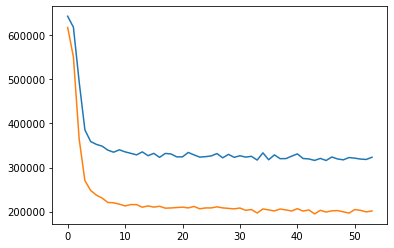

In [45]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.show()

##  Model tuning and Hyperparameter Tuning
## Question 7 (Optional)

### Create another Deep Neural Network Model for Regression to experiment with other hyper-parameters
- Initialize a Sequential model
- Add a batch normalization layer
- Add 3 hidden layer with activation leaky-relu (Number of neurons = 64,128,32 respectively)
- Add dropout layer after each hidden layer
- Add a Dense layer with one neuron as output, use activation linear
  


### Compile the model

- Compile the model
- Use "adam" optimizer 
- for calculating loss, use mean absolute error
- use R2 score (coefficient of determination) as the metric

### Train your model

- epochs: 1000
- batch size: 16
- Use test data as validation data
- Also add callback, such that if validation loss doesn't decreases consecutively 10 times, stop the training and return the weights for the previous best model
- Add checkpoints to save the model after every epoch


### Check the R2 score on complete test data

### Visualize model learning
- Visualize model learning using train and test r2 score
- Visualize model learning using train and test loss

### Create another Deep Neural Network Model for Regression to experiment with other hyper-parameters
- Initialize a Sequential model
- Add a batch normalization layer
- Intialize weights using HeUniform with seed = 7
- Add 4 hidden layer with activation relu (Number of neurons = 256,128,64,32 in each layer respectively)
- Add dropout layer after each hidden layer
- Add a Dense layer with one neuron as output, use activation linear
  


### Compile the model

- Compile the model
- Use "adam" optimizer with learning rate = 0.002
- for calculating loss, use mean squared error
- use R2 score (coefficient of determination) as the metric

### Train your model

- epochs: 1000
- batch size: 64
- Use test data as validation data
- Also add callback, such that if validation loss doesn't decreases consecutively 10 times, stop the training and return the weights for the previous best model



### Check the R2 score on complete test data

### Visualize model learning
- Visualize model learning using train and test r2 score
- Visualize model learning using train and test loss